In [1]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
# 1. Augmentation
    # 1. Dynamic
    # 2. Static
# 2. Segmentation
# 3. Anotation

In [3]:
# # Overfitting
#     1.  EarlyStoping
#     2. Dropout
#     3. Regularization

In [4]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [5]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [6]:
print(len(classNameslabels))

2


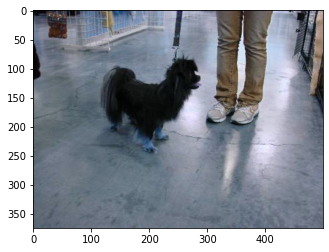

In [7]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread("dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [8]:
print(imageData.shape)

(375, 499, 3)


In [9]:
image_shape = (128, 128)

In [10]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

In [11]:
(train_image, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

Counting : dataset/training_set/


100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:41<00:00, 96.14it/s]


Counting : dataset/test_set/


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 210.26it/s]


In [12]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 26)

In [13]:
_,trainImageLabelInfo = np.unique(train_labels , return_counts=True)
_,testImageLabelInfo = np.unique(test_labels , return_counts=True )

In [14]:
print('Train image label information for 0 class ', trainImageLabelInfo[0])
print('Train image label information for 1 class ', trainImageLabelInfo[1])

print('-----------------------------------------------------------------------')


print('Test image label information for 0 class ', testImageLabelInfo[0])
print('Test image label information for 1 class ', testImageLabelInfo[1])

Train image label information for 0 class  4000
Train image label information for 1 class  4000
-----------------------------------------------------------------------
Test image label information for 0 class  1000
Test image label information for 1 class  1000


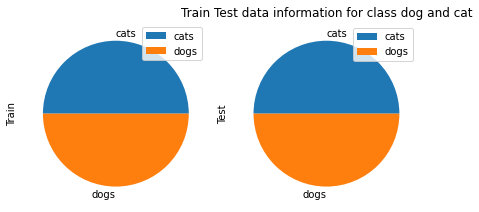

In [15]:
pd.DataFrame({'Train': trainImageLabelInfo,
             'Test':testImageLabelInfo},
            index = classNames).plot.pie(subplots=True)

plt.title('Train Test data information for class dog and cat')
plt.grid(False)
plt.tight_layout()
plt.show()

In [16]:
imageFeature = train_images[0]

In [17]:
len(np.unique(imageFeature))

256

In [18]:
pd.DataFrame({'Train': trainImageLabelInfo,
             'Test':testImageLabelInfo},
            index = classNames)

,Train,Test
cats,4000,1000
dogs,4000,1000


In [19]:
train_images = train_images/255.0
test_image = test_image/255.0

In [20]:
np.unique(train_images[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
       0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
       0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
       0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
       0.27450982, 0.2784314 , 0.28235295, 0.28627452, 0.29019

In [21]:
print(int(train_labels[66]))

0


In [22]:
np.random.randint(train_images.shape[0])

2977

In [23]:
def imageVisualization(classNames,imagePath,imagelabel):
    index = np.random.randint(imagePath.shape[0])
    plt.figure()
    plt.imshow(imagePath[index])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    
    plt.title("The index of the amage is :{}".format(index)+"And the title is :"+classNames[int(imagelabel[index])])
    plt.show()

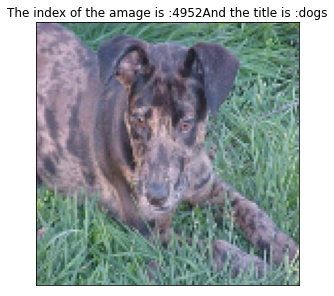

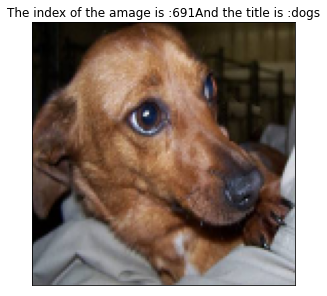

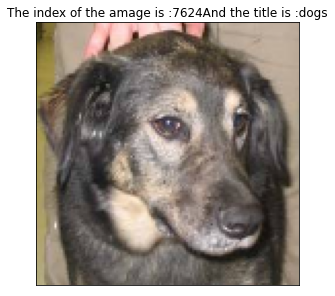

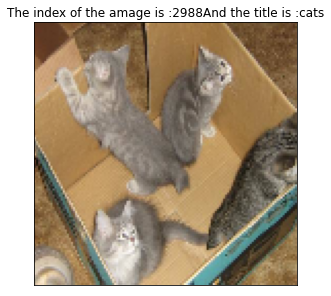

In [24]:
for i in range(1,5):
    imageVisualization(classNames,train_images,train_labels)

In [25]:
def ImageVisualization2(classNames,imagePath,imagelabel):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle('Random image visualizatin',fontsize = 20)
    
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i],cmap = plt.cm.binary)
        plt.xlabel('Class name : {}'.format(classNames[int(imagelabel[i])]))
        
    plt.show()   
        

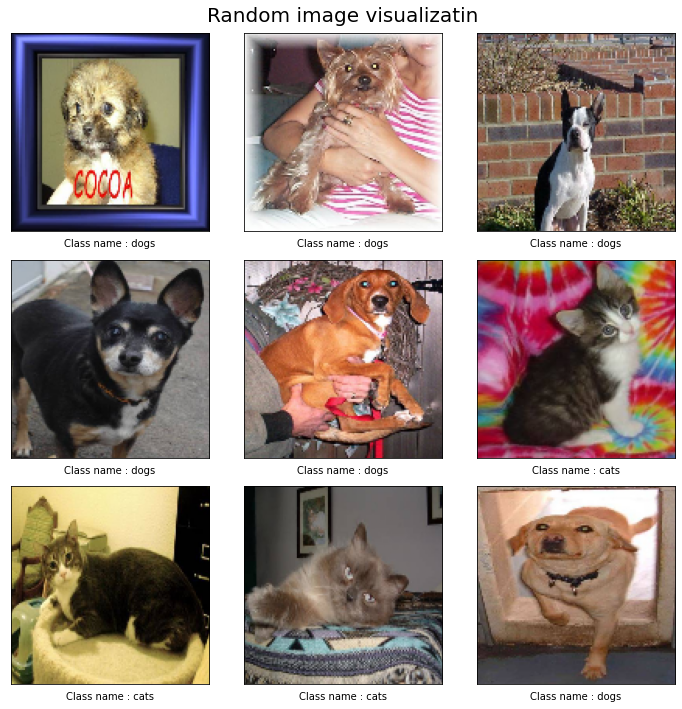

In [26]:
ImageVisualization2(classNames,train_images,train_labels)

In [27]:
train_images.shape

(8000, 128, 128, 3)

In [28]:
model = Sequential([
    #input layer
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    
    #first Hiden layer
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    #2nd Heden layer
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    #Third Heden layer
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    #Last Connect layer
    
    Flatten(),
    
    Dense(256,activation='relu'),
    Dense(2,activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy']
             )

In [31]:
modelData=model.fit(train_images,
                    train_labels,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 95s 2s/step - loss: 0.6954 - accuracy: 0.5387 - val_loss: 0.6749 - val_accuracy: 0.5656
Epoch 2/10
50/50 [==============================] - 84s 2s/step - loss: 0.6447 - accuracy: 0.6198 - val_loss: 0.6286 - val_accuracy: 0.6519
Epoch 3/10
50/50 [==============================] - 85s 2s/step - loss: 0.6047 - accuracy: 0.6745 - val_loss: 0.6312 - val_accuracy: 0.6463
Epoch 4/10
50/50 [==============================] - 80s 2s/step - loss: 0.5559 - accuracy: 0.7102 - val_loss: 0.5607 - val_accuracy: 0.7144
Epoch 5/10
50/50 [==============================] - 82s 2s/step - loss: 0.5162 - accuracy: 0.7442 - val_loss: 0.5538 - val_accuracy: 0.7094
Epoch 6/10
50/50 [==============================] - 81s 2s/step - loss: 0.4852 - accuracy: 0.7683 - val_loss: 0.5050 - val_accuracy: 0.7506
Epoch 7/10
50/50 [==============================] - 82s 2s/step - loss: 0.4205 - accuracy: 0.7995 - val_loss: 0.4618 - val_accuracy: 0.7825
Epoch 8/10
50/50 [==

In [32]:
def accuracy_and_loss_plot(modelData):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(modelData.history['accuracy'],'bo--', label ='accuracy')
    plt.plot(modelData.history['val_accuracy'], 'ro--', label ='val_accuracy')
    plt.title('Training Data accuracy measurement')
    plt.xlabel('Number of Epoch')
    plt.ylabel('Accuracy Measurement')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    plt.subplot(222)
    plt.plot(modelData.history['loss'],'bo--', label = 'loss')
    plt.plot(modelData.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title('Training Data Accuracy Information')
    plt.xlabel('Number of Epoch')
    plt.ylabel('Accuracy Measurement')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    plt.show()

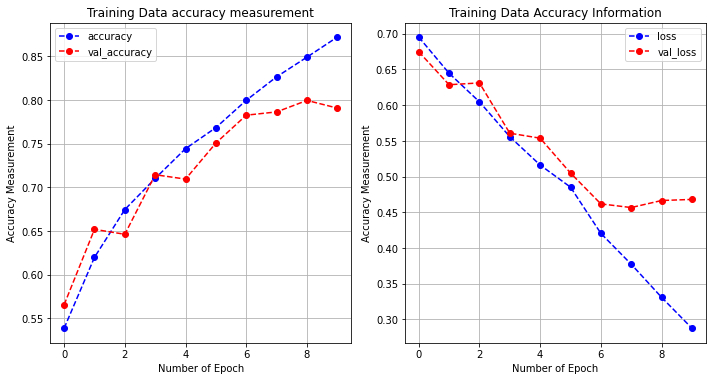

In [33]:
accuracy_and_loss_plot(modelData)

In [34]:
testloss = model.evaluate(test_image,test_labels)

63/63 [==============================] - 7s 112ms/step - loss: 0.4018 - accuracy: 0.8295


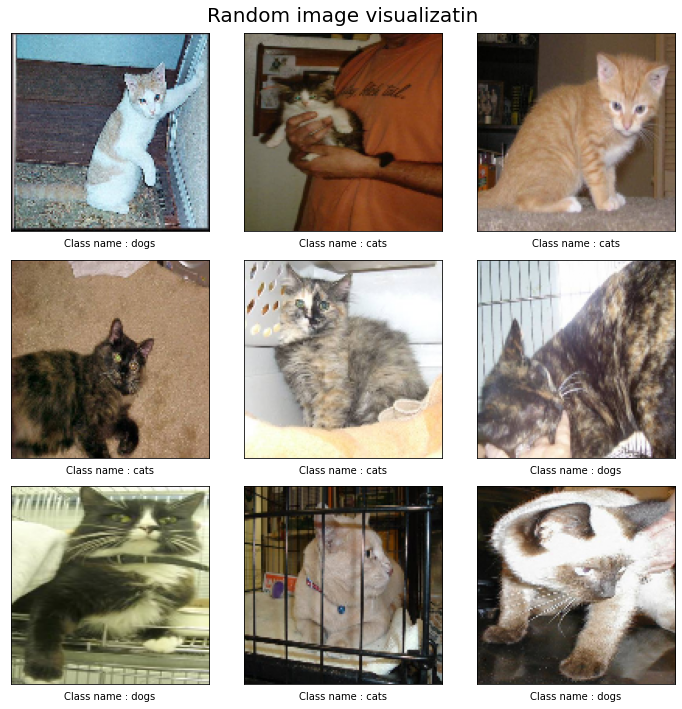

In [35]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData,axis=1)
ImageVisualization2(classNames,test_image,predictedDataLabels)

<AxesSubplot:>

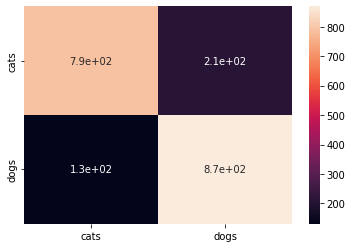

In [36]:
cm=confusion_matrix(test_labels,predictedDataLabels)
ax=plt.axes()
sns.heatmap(cm,annot=True,
           annot_kws={'size':10},
           xticklabels = classNames,
           yticklabels = classNames,
           ax=ax)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(test_labels,predictedDataLabels)

0.8295

In [39]:
confusion_matrix(test_labels,predictedDataLabels)

array([[790, 210],
       [131, 869]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report


In [41]:
print(classification_report(test_labels,predictedDataLabels))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      1000
         1.0       0.81      0.87      0.84      1000

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [48]:
def missClassification(classNames, testData, ImageLabels, predictedDataLabels):
    
     
    result = (ImageLabels == predictedDataLabels)
    #print(result)
    missClass = np.where(result == 0)
   # print(int(missClass))
    
    missClassImage = testData[missClass]
    missClasslabels = predictedDataLabels[missClass]
    
    print("Miss Classification Image Data is: ")
    ImageVisualization2(classNames, missClassImage, missClasslabels)

Miss Classification Image Data is: 


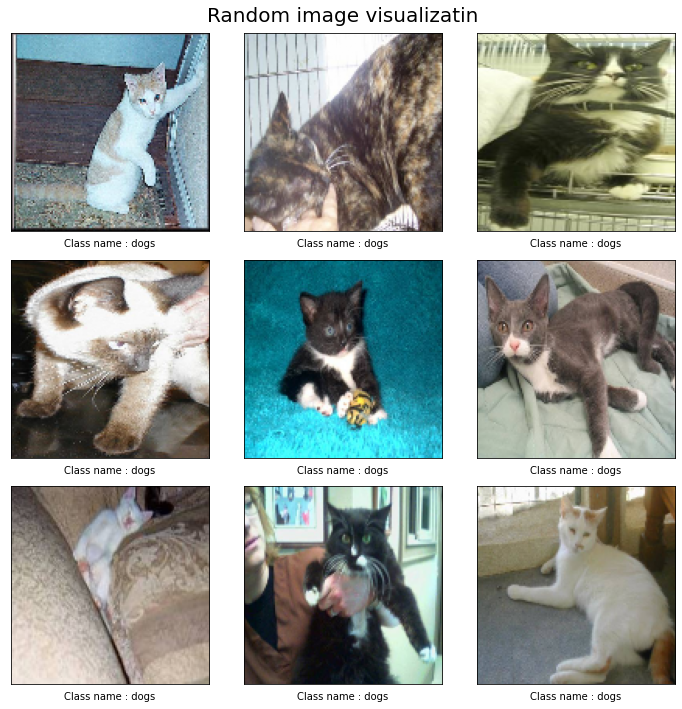

In [49]:
missClassification(classNames, test_image, test_labels, predictedDataLabels)

In [ ]:
int(test_labels[528])

In [ ]:
predictedDataLabels[1569]